# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [26]:
df = pd.read_csv("heart.csv");

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [30]:
print("Missing Values per Kolom:")
print(df.isnull().sum())

print("Duplikat data:", df.duplicated().sum())

Missing Values per Kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Duplikat data: 1


<function matplotlib.pyplot.show(close=None, block=None)>

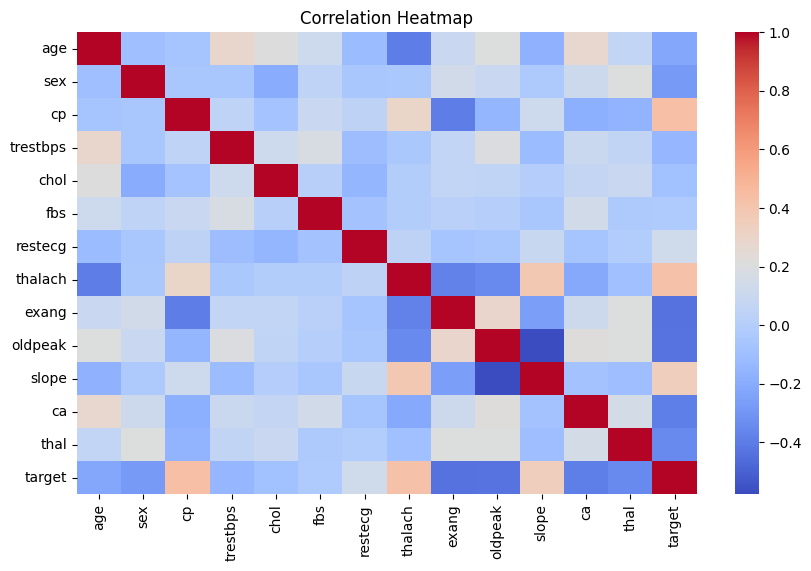

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show

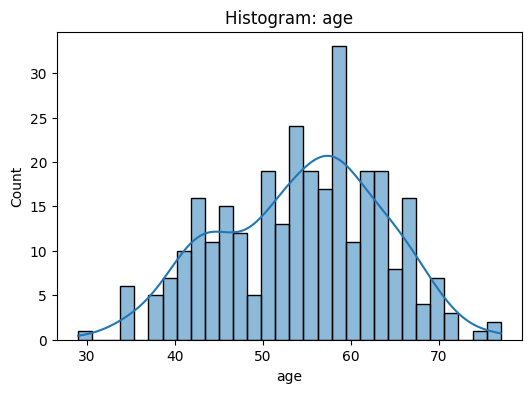

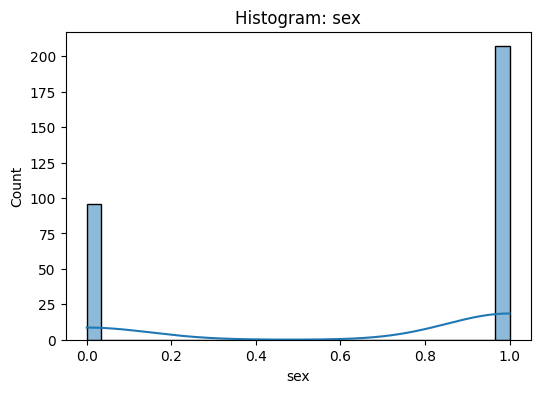

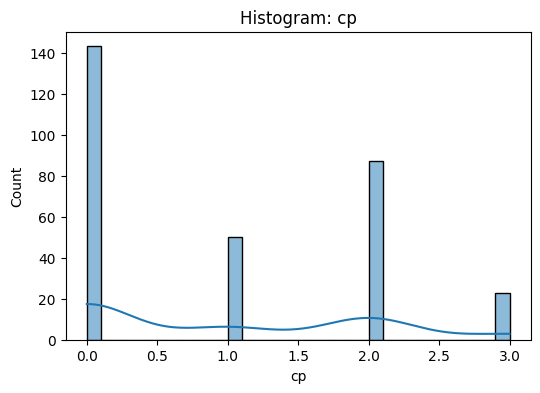

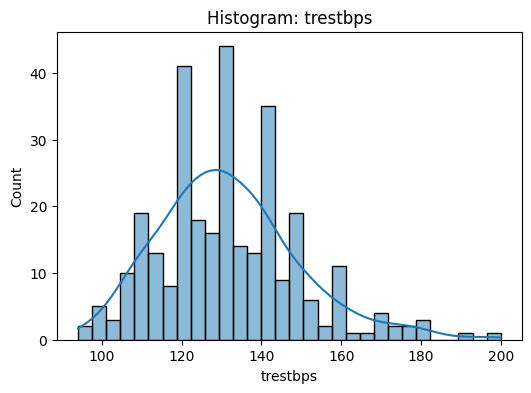

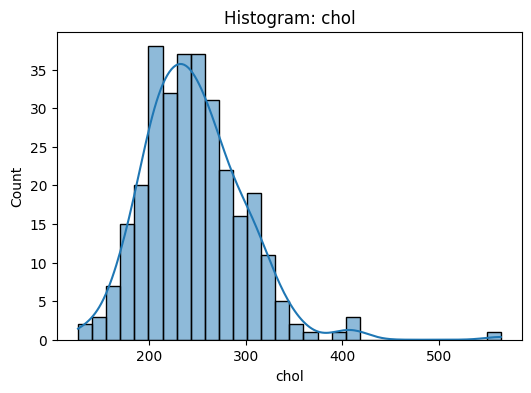

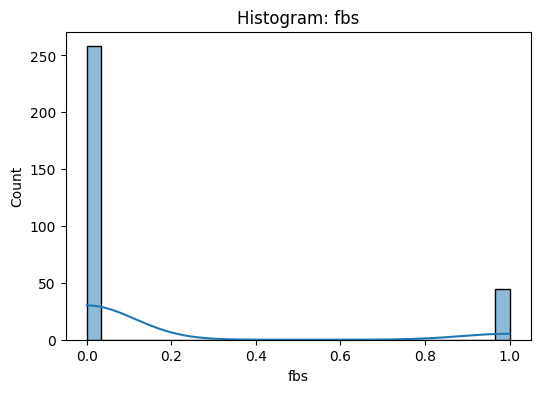

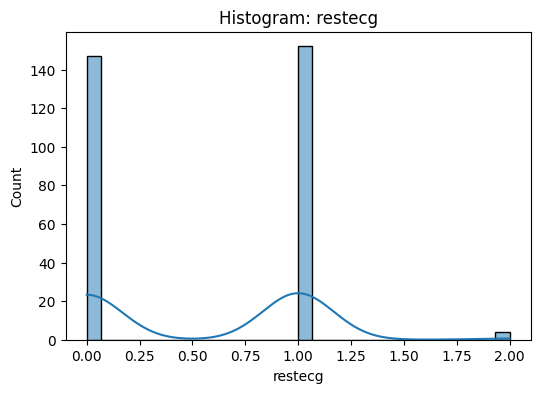

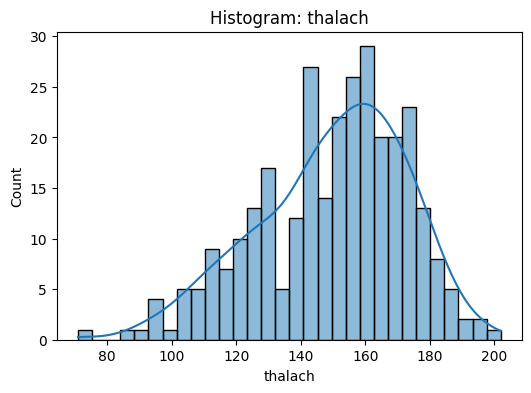

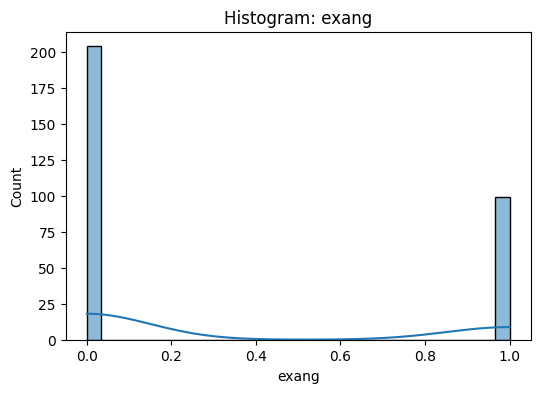

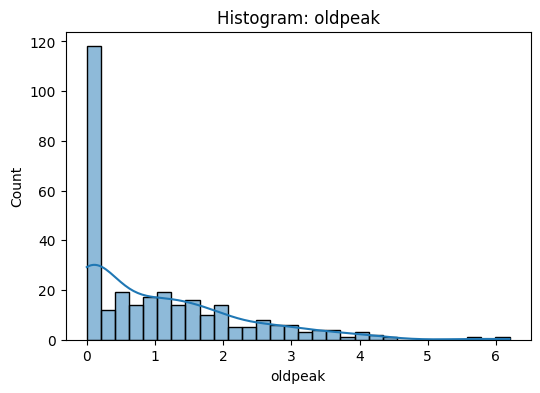

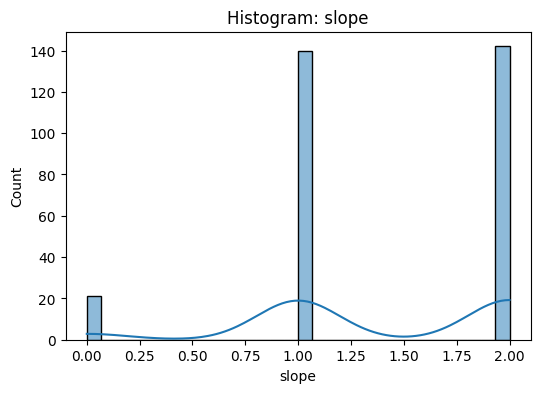

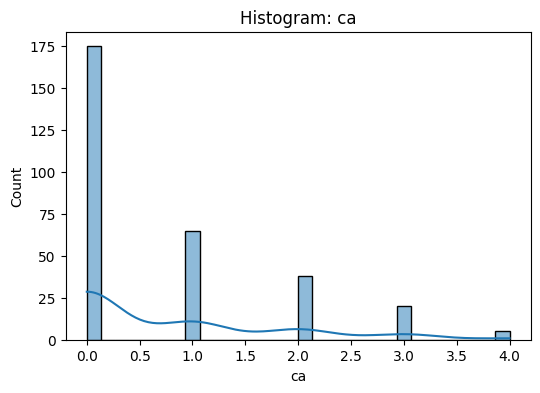

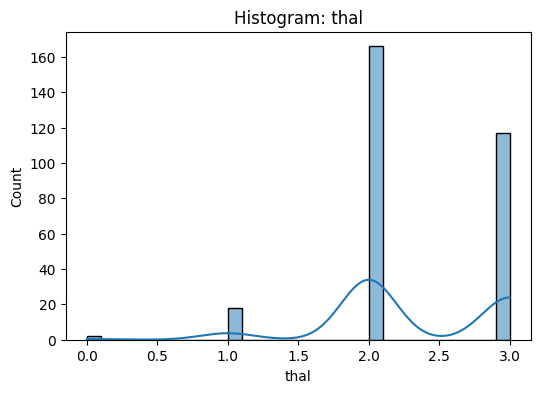

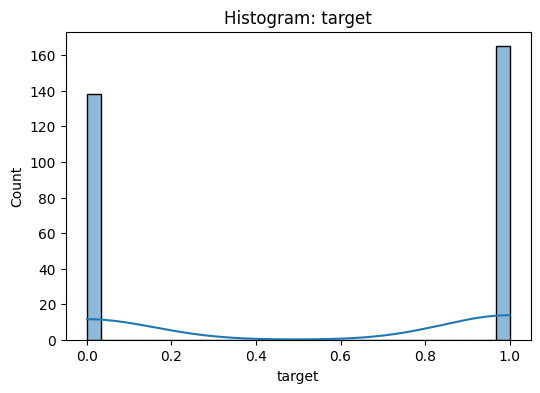

In [32]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col], kde=True, bins=30)
  plt.title(f"Histogram: {col}")
  plt.show()


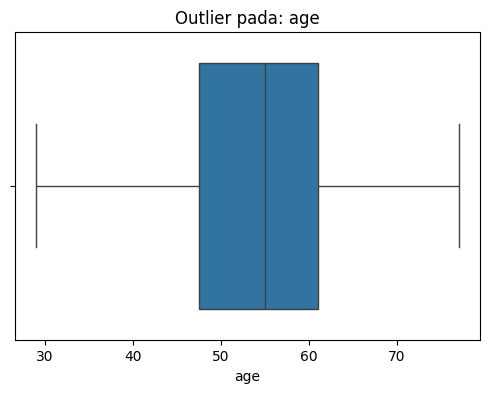

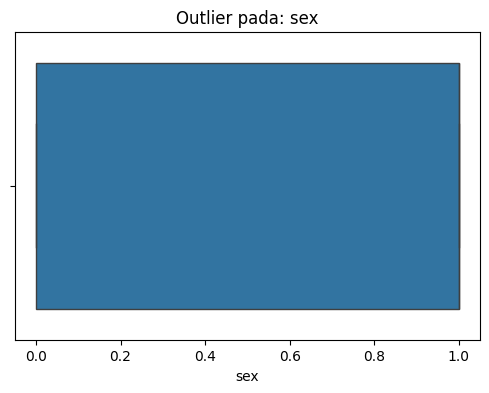

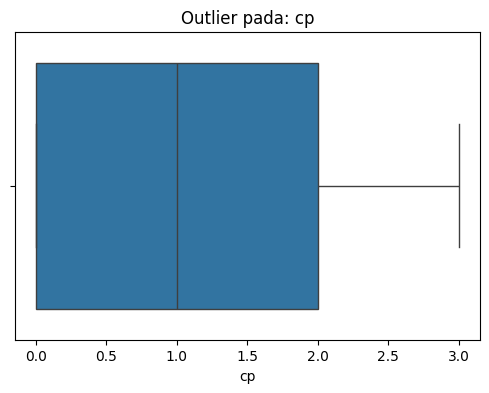

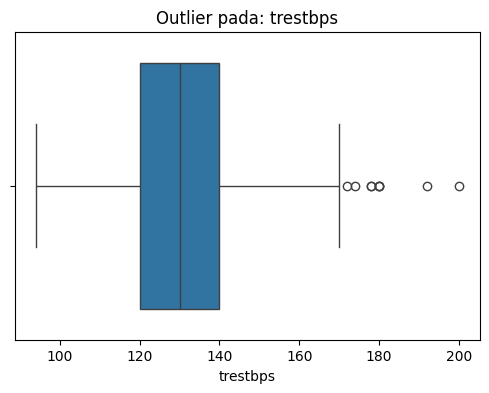

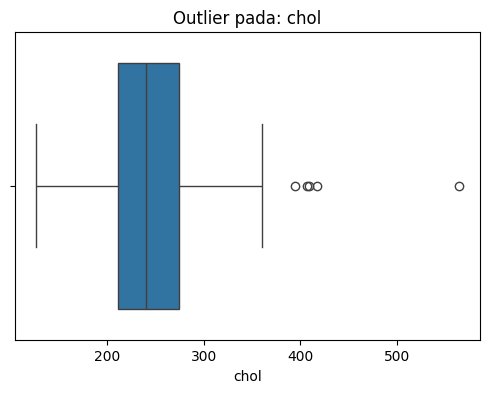

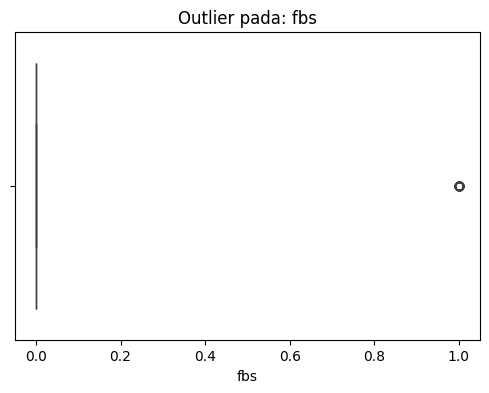

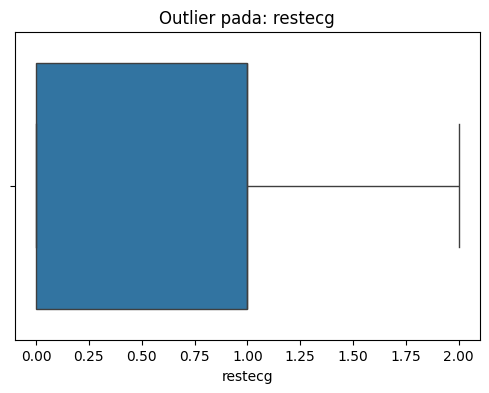

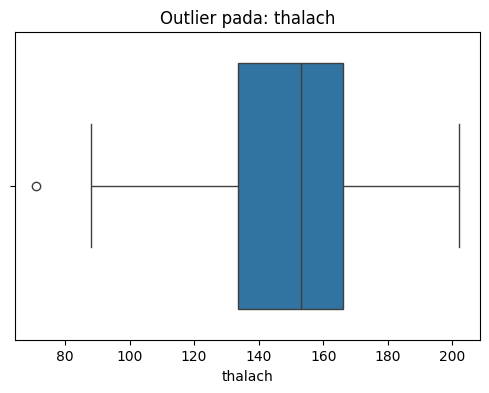

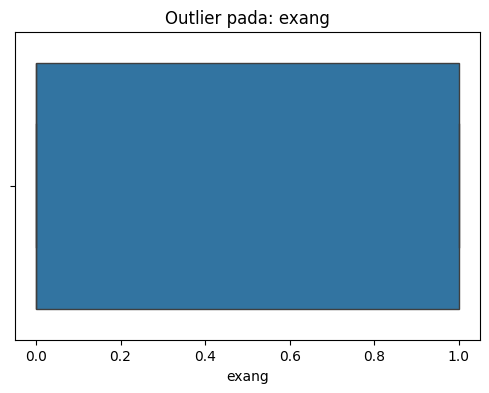

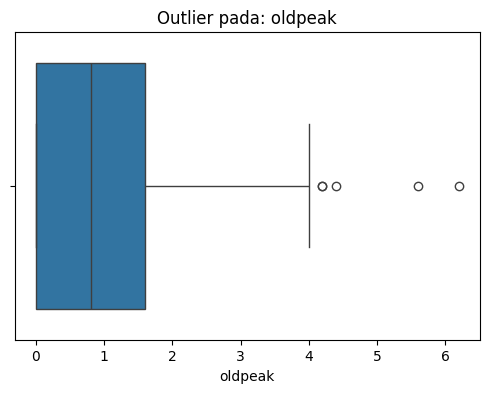

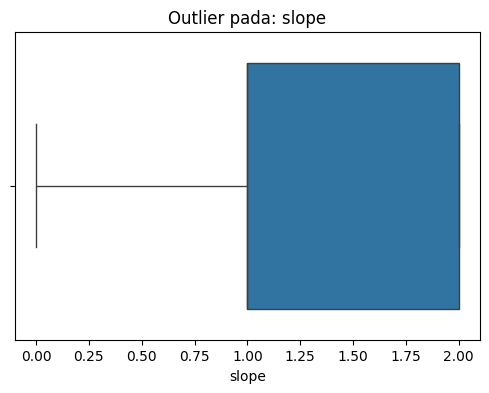

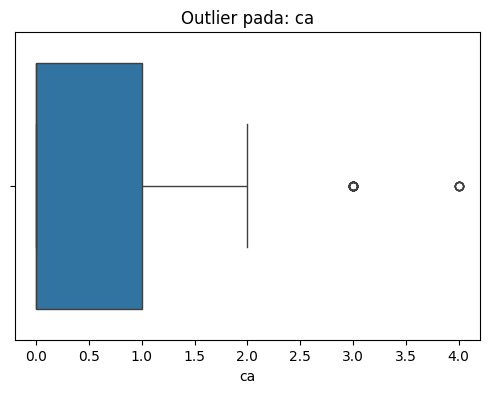

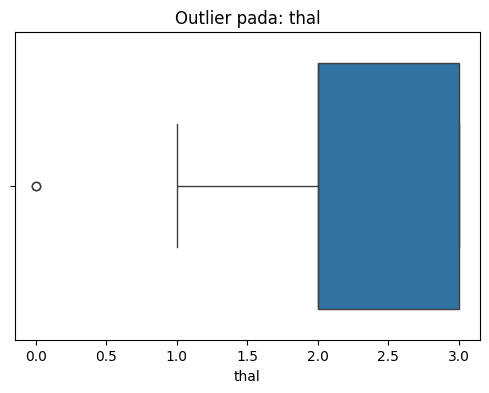

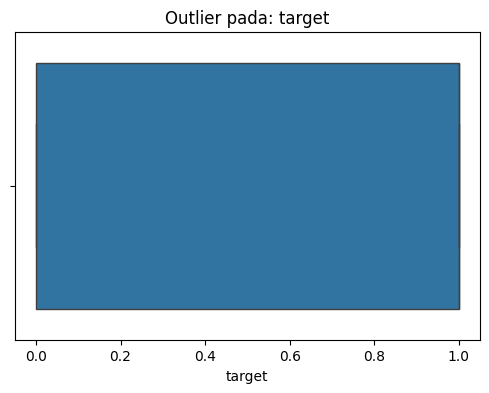

In [33]:
for col in num_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])
  plt.title(f"Outlier pada: {col}")
  plt.show()

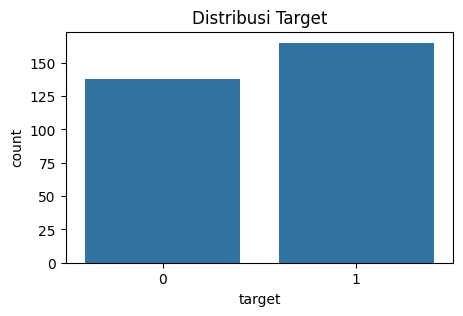

🔹 Korelasi terhadap Target:
target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


In [34]:
target_col = "target"

if target_col in df.columns:
    # Plot distribusi target
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[target_col])
    plt.title("Distribusi Target")
    plt.show()

    # Korelasi fitur numerik terhadap target
    corr_target = df.corr()[target_col].sort_values(ascending=False)
    print("🔹 Korelasi terhadap Target:")
    print(corr_target)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [35]:
def run_preprocessing_only(
    input_path: str = "heart.csv",
    output_path: str = "heart_preprocessing.csv"
):
    # === 1. Load data raw ===
    df = pd.read_csv(input_path)
    print("Shape awal:", df.shape)

    # === 2. Drop duplicated rows ===
    dup_before = df.duplicated().sum()
    print("Duplikat sebelum drop:", dup_before)

    if dup_before > 0:
        df = df.drop_duplicates()
        dup_after = df.duplicated().sum()
        print("Duplikat setelah drop:", dup_after)
        print("Shape baru:", df.shape)
    else:
        print("Tidak ada duplikat yang perlu di-drop.")

    # === 3. Deteksi Outlier (Winsorizing) ===
    num_cols = df.select_dtypes(include=np.number).columns

    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1

    for col in num_cols:
        lower = Q1[col] - 1.5 * IQR[col]
        upper = Q3[col] + 1.5 * IQR[col]
        df[col] = np.where(
            df[col] < lower, lower,
            np.where(df[col] > upper, upper, df[col])
        )
    print("Outlier handled (Winsorized).")

    # === 4. Handle Missing Value jika ada ===
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    print("Missing value handled (jika ada).")

    # === 5. Scaling numerik kecuali target===
    target_col = "target"
    num_cols = df.select_dtypes(include=np.number).columns.tolist()

    if target_col in num_cols:
        num_cols.remove(target_col)

    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    print("Numerical features scaled (target excluded).")

    # === 6. Simpan hasil ===
    out_dir = os.path.dirname(output_path)
    if out_dir != "":
        os.makedirs(out_dir, exist_ok=True)

    df.to_csv(output_path, index=False)
    print("Preprocessing selesai. File disimpan di", output_path)


if __name__ == "__main__":
    run_preprocessing_only()

Shape awal: (303, 14)
Duplikat sebelum drop: 1
Duplikat setelah drop: 0
Shape baru: (302, 14)
Outlier handled (Winsorized).
Missing value handled (jika ada).
Numerical features scaled (target excluded).
Preprocessing selesai. File disimpan di heart_preprocessing.csv
